In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import Counter


### Dataset Description

The dataset used for this project is **CarPrice_Assignment.csv**, which contains information about various car attributes and their prices. Below is the description of the dataset:

- **car_ID**:  
  - Type: Integer  
  - Description: A unique identifier for each car.  

- **symboling**:  
  - Type: Integer  
  - Description: A risk factor rating for car insurance (ranges from -3 to +3).  

- **CarName**:  
  - Type: String  
  - Description: Name of the car (includes brand and model).  

- **fueltype**:  
  - Type: String  
  - Description: Type of fuel used by the car (e.g., gas, diesel).  

- **aspiration**:  
  - Type: String  
  - Description: Type of aspiration used in the engine (e.g., standard, turbo).  

- **doornumber**:  
  - Type: String  
  - Description: Number of doors on the car (e.g., two, four).  

- **carbody**:  
  - Type: String  
  - Description: The body style of the car (e.g., convertible, sedan, hatchback).  

- **drivewheel**:  
  - Type: String  
  - Description: The drive wheel configuration (e.g., fwd, rwd, 4wd).  

- **enginelocation**:  
  - Type: String  
  - Description: Location of the engine in the car (e.g., front, rear).  

- **wheelbase**:  
  - Type: Float  
  - Description: The distance between the front and rear axles (in inches).  

- **carlength**:  
  - Type: Float  
  - Description: The length of the car (in inches).  

- **carwidth**:  
  - Type: Float  
  - Description: The width of the car (in inches).  

- **carheight**:  
  - Type: Float  
  - Description: The height of the car (in inches).  

- **curbweight**:  
  - Type: Float  
  - Description: The weight of the car without occupants or baggage (in lbs).  

- **enginetype**:  
  - Type: String  
  - Description: Type of engine (e.g., dohc, ohcv, l, rotor).  

- **cylindernumber**:  
  - Type: String  
  - Description: Number of cylinders in the engine (e.g., two, four, six).  

- **enginesize**:  
  - Type: Integer  
  - Description: The size of the engine (in cubic inches).  

- **fuelsystem**:  
  - Type: String  
  - Description: Fuel system used in the car (e.g., mpfi, 2bbl, 1bbl).  

- **boreratio**:  
  - Type: Float  
  - Description: The bore diameter of the cylinder (in inches).  

- **stroke**:  
  - Type: Float  
  - Description: The stroke length of the cylinder (in inches).  

- **compressionratio**:  
  - Type: Float  
  - Description: The ratio of the volume of the combustion chamber from its largest capacity to its smallest capacity.  

- **horsepower**:  
  - Type: Integer  
  - Description: The power output of the engine (in horsepower).  

- **peakrpm**:  
  - Type: Integer  
  - Description: Peak revolutions per minute of the engine.  

- **citympg**:  
  - Type: Integer  
  - Description: Miles per gallon in city driving conditions.  

- **highwaympg**:  
  - Type: Integer  
  - Description: Miles per gallon in highway driving conditions.  

- **price**:  
  - Type: Float  
  - Description: The price of the car (in USD).  


In [15]:
# Load the dataset
file_path = 'CarPrice_Assignment.csv'
data = pd.read_csv(file_path)

In [16]:
# ============================================
# Add target column for price classification
# ============================================

def classify_price(price):
    if price < 10000:
        return 'Low'
    elif 10000 <= price < 20000:
        return 'Medium'
    else:
        return 'High'

data['price_category'] = data['price'].apply(classify_price)

# Verify dataset size and features
print(f"Number of rows: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")
# Verify classes in the target column
print(f"Number of unique price categories: {data['price_category'].nunique()}")
print(f"Classes in price_category: {data['price_category'].unique()}")

# Display column names and their data types
print("Column Names and Data Types:\n", data.dtypes)



Number of rows: 205
Number of features: 27
Number of unique price categories: 3
Classes in price_category: ['Medium' 'High' 'Low']
Column Names and Data Types:
 car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
price_category       object
dtype: object


In [17]:
# ================================================
# Drop irrelevant columns and handle missing data
# ================================================


# Handling missing values
missing_summary = data.isnull().sum()
print("Missing values in each column:\n", missing_summary)

# Drop columns with too many missing values (if any)
threshold = 0.4  # Example: Drop columns with more than 40% missing values
data = data.loc[:, data.isnull().mean() < threshold]

# Impute remaining missing values with mean/median/mode as appropriate
for col in data.columns:
    if data[col].isnull().sum() > 0:
        if data[col].dtype == 'object':  # Categorical features
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:  # Numerical features
            data[col].fillna(data[col].mean(), inplace=True)

print("Missing values after handling:\n", data.isnull().sum())

data = data.drop(['CarName', 'car_ID', 'price'], axis=1)
data.head()


Missing values in each column:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
price_category      0
dtype: int64
Missing values after handling:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_category
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,Medium
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,Medium
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,Medium
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,Medium
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,Medium


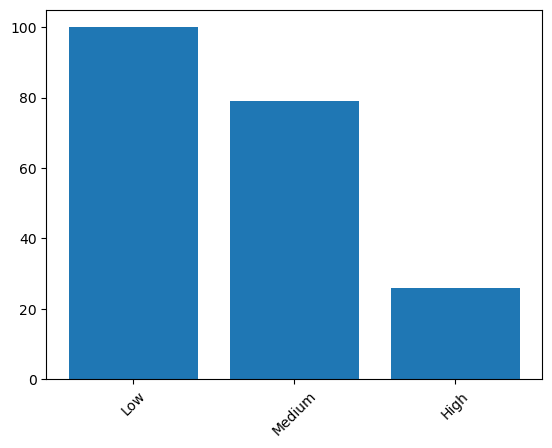

In [18]:
# ==========================================
# Price category distribution
# ==========================================
data_occurences = data.groupby("price_category").size().reset_index().sort_values(by=0, ascending=False)
data_occ_df = pd.DataFrame(data_occurences)
plt.bar(data_occurences["price_category"], data_occurences[0])
plt.xticks(rotation=45)
plt.show()



array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'fueltype'}>,
        <Axes: title={'center': 'aspiration'}>,
        <Axes: title={'center': 'doornumber'}>,
        <Axes: title={'center': 'carbody'}>],
       [<Axes: title={'center': 'drivewheel'}>,
        <Axes: title={'center': 'enginelocation'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>,
        <Axes: title={'center': 'carwidth'}>],
       [<Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginetype'}>,
        <Axes: title={'center': 'cylindernumber'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'fuelsystem'}>,
        <Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakr

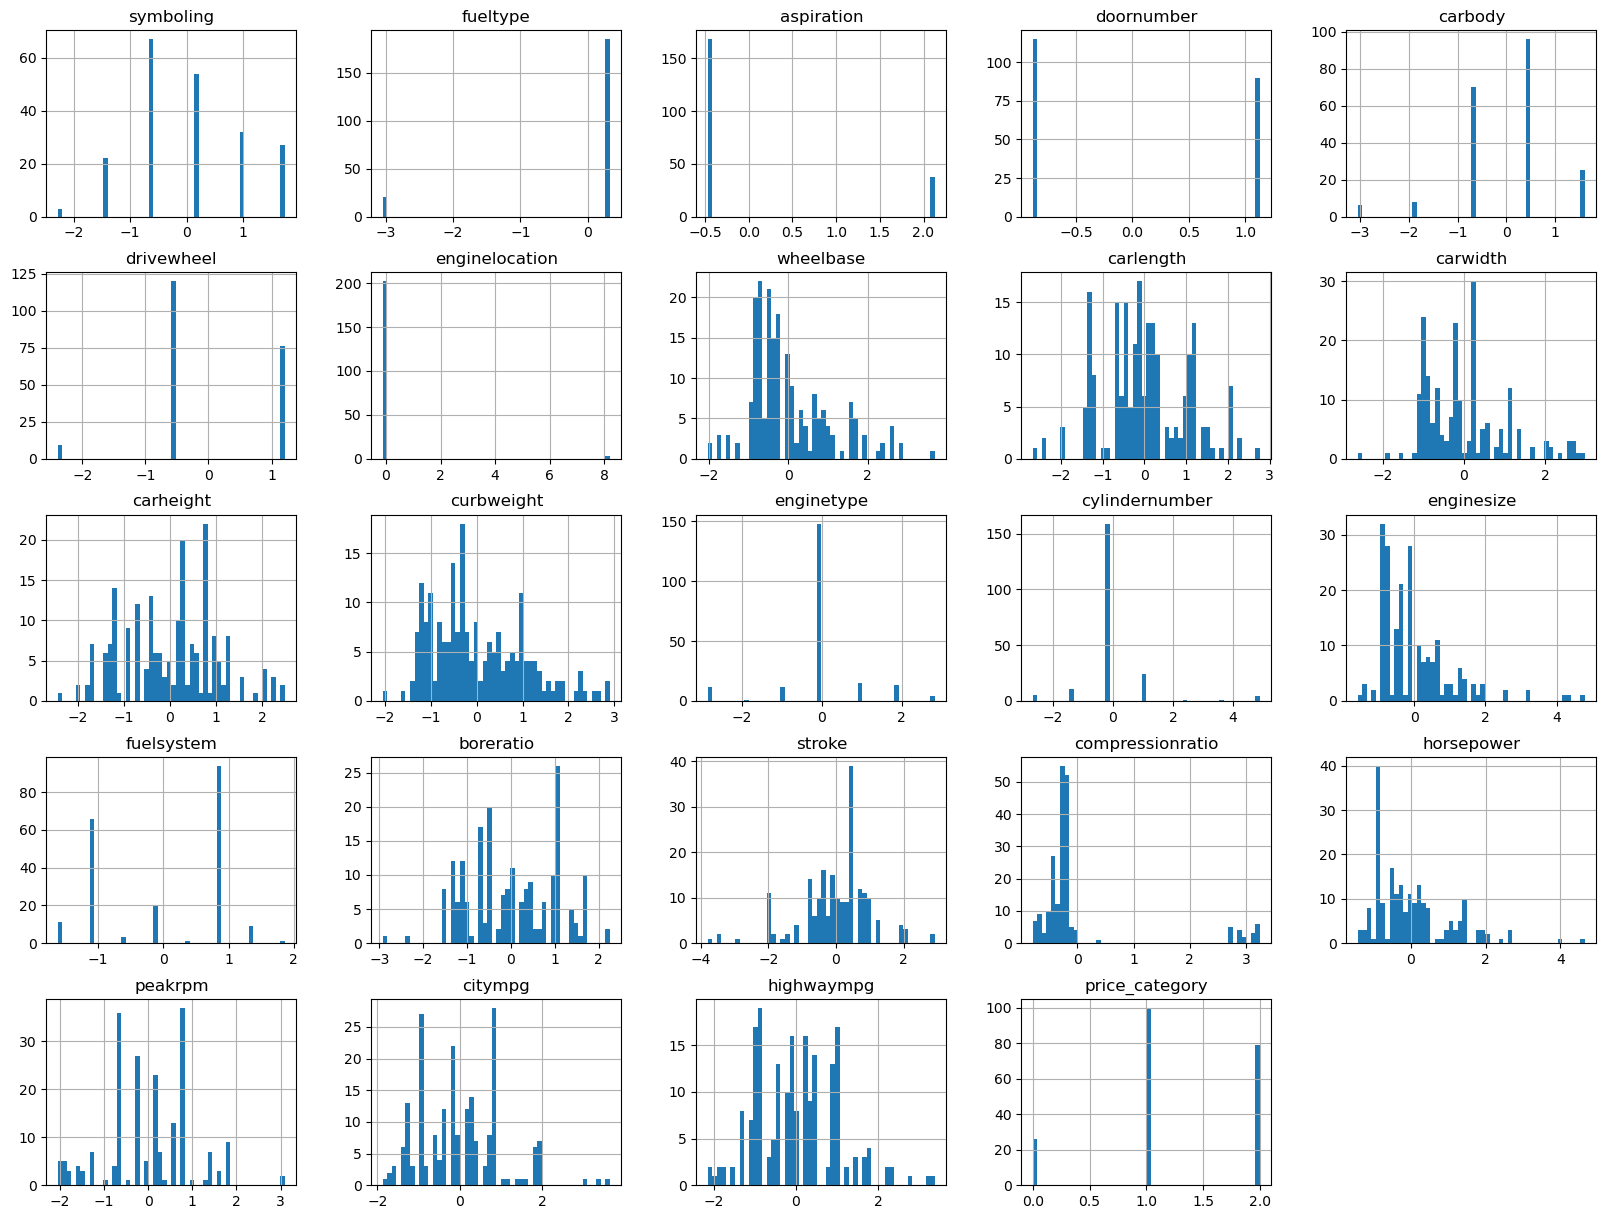

In [19]:
# ============================================
# Encode categorical features
# ============================================

categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# ============================================
# Normalize numerical features
# ============================================

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop('price_category', errors='ignore')
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

#Histograms
data.hist(bins=50, figsize=(20, 15))


In [20]:
# ==========================================
# Split Dataset into Train and Test Sets
# ==========================================
X = data.drop(['price_category', 'price'], axis=1, errors='ignore')  # Drop target and irrelevant columns
y = data['price_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Print final dataset shapes
print(X[numerical_cols].describe())
print("\nShapes of Train and Test Sets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")
print(y.unique())

data.head()


          symboling      fueltype    aspiration    doornumber       carbody  \
count  2.050000e+02  2.050000e+02  2.050000e+02  2.050000e+02  2.050000e+02   
mean   4.332578e-17 -7.798640e-17  6.282238e-17  1.039819e-16 -1.646380e-16   
std    1.002448e+00  1.002448e+00  1.002448e+00  1.002448e+00  1.002448e+00   
min   -2.281433e+00 -3.041381e+00 -4.692953e-01 -8.846517e-01 -3.050975e+00   
25%   -6.714717e-01  3.287980e-01 -4.692953e-01 -8.846517e-01 -7.172069e-01   
50%    1.335090e-01  3.287980e-01 -4.692953e-01 -8.846517e-01  4.496773e-01   
75%    9.384897e-01  3.287980e-01 -4.692953e-01  1.130388e+00  4.496773e-01   
max    1.743470e+00  3.287980e-01  2.130854e+00  1.130388e+00  1.616562e+00   

         drivewheel  enginelocation     wheelbase     carlength      carwidth  \
count  2.050000e+02    2.050000e+02  2.050000e+02  2.050000e+02  2.050000e+02   
mean  -1.126470e-16   -8.665155e-18 -1.291108e-15  3.656696e-15  1.089643e-15   
std    1.002448e+00    1.002448e+00  1.002448

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_category
0,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,2
1,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,2
2,0.133509,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.708596,-0.231513,-0.190566,...,0.604046,0.869568,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,2
3,0.938490,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.173698,0.207256,0.136542,...,-0.431076,0.869568,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,2
4,0.938490,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.107110,0.207256,0.230001,...,0.218885,0.869568,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,2


In [21]:
# ==========================================
# Define Classifiers
# ==========================================
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SGD': SGDClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)  # Enable probability for ROC curve
}

# ==========================================
# Define Visualizations
# ==========================================

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names, title="Confusion Matrix"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_proba, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=max(set(y_test)))
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

# Function to plot decision tree
def plot_decision_tree(clf, feature_names, class_names):
    class_names = [str(cls) for cls in class_names]
    plt.figure(figsize=(20, 20))
    plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, fontsize=10)
    plt.title("Decision Tree Visualization")
    plt.show()

def plot_feature_importance(clf, feature_names):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]  # Sort by descending importance

    plt.figure(figsize=(12, 8))  # Increase figure size for readability
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices], align="center")
    
    # Properly align feature names
    plt.xticks(
        range(len(importances)),
        [feature_names[i] for i in indices],
        rotation=60,  # Adjust rotation angle for clarity
        ha='right'  # Align text to the right
    )
    plt.tight_layout(pad=2)  # Add padding to avoid text cutoff
    plt.show()
    
    # Print sorted feature names for verification
    print("Feature Importance Ranking:")
    for rank, idx in enumerate(indices):
        print(f"{rank + 1}. {feature_names[idx]}: {importances[idx]:.4f}")


--- Logistic Regression ---
Accuracy: 0.7805
Precision: 0.7841
Recall: 0.7805
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.84      0.80      0.82        20
           2       0.73      0.69      0.71        16

    accuracy                           0.78        41
   macro avg       0.76      0.83      0.79        41
weighted avg       0.78      0.78      0.78        41



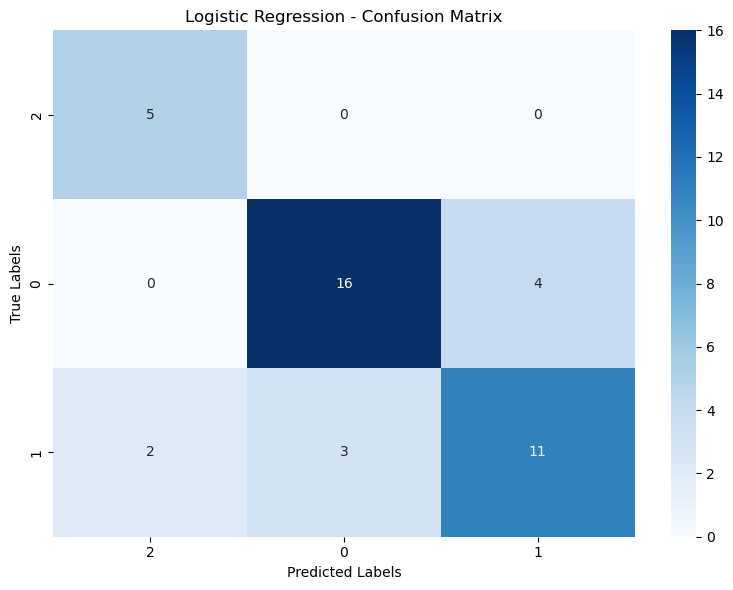

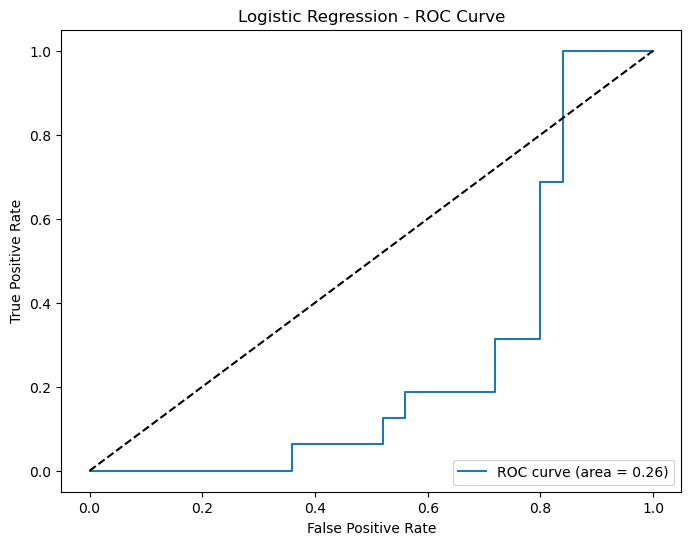

--- Decision Tree ---
Accuracy: 0.8293
Precision: 0.8354
Recall: 0.8293
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.86      0.90      0.88        20
           2       0.85      0.69      0.76        16

    accuracy                           0.83        41
   macro avg       0.81      0.86      0.82        41
weighted avg       0.84      0.83      0.83        41



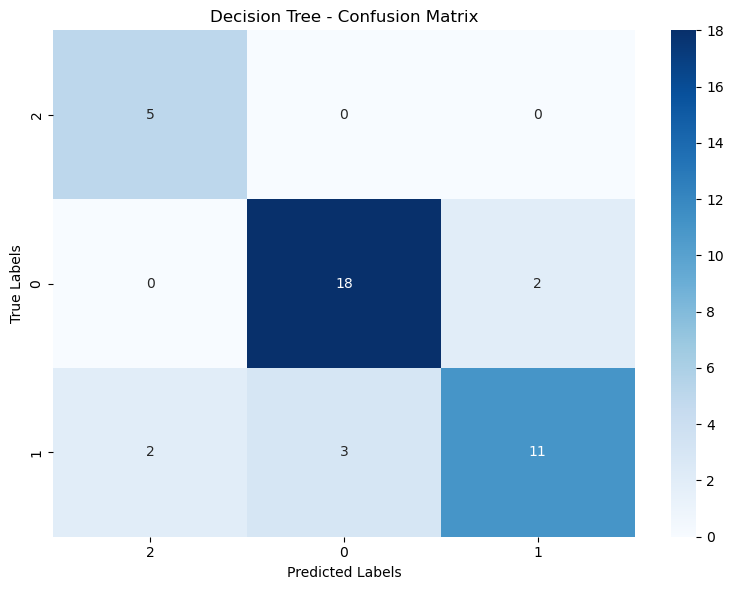

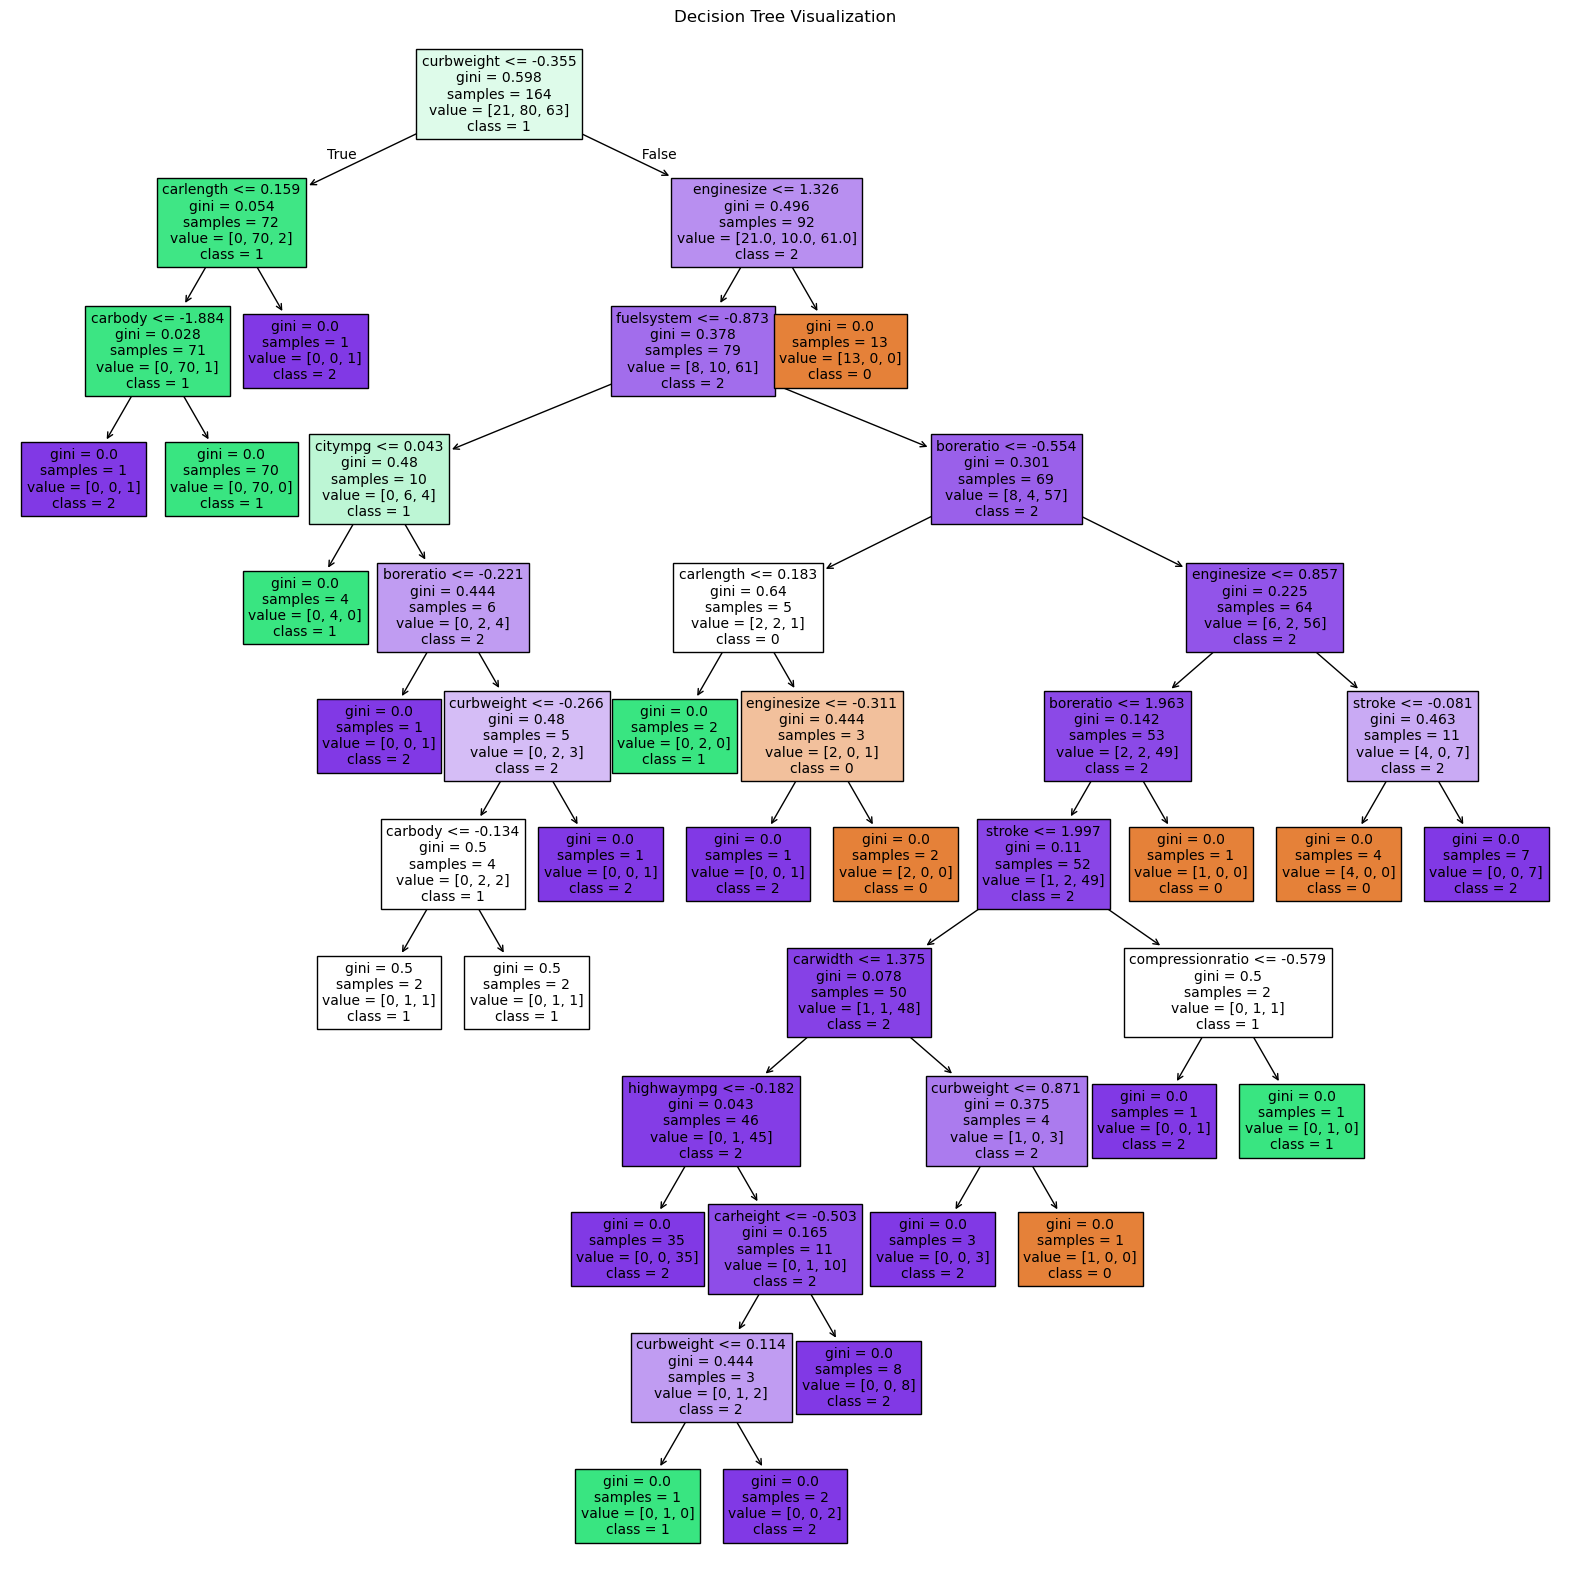

--- Random Forest ---
Accuracy: 0.8537
Precision: 0.8720
Recall: 0.8537
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.94      0.75      0.83        20
           2       0.75      0.94      0.83        16

    accuracy                           0.85        41
   macro avg       0.90      0.90      0.89        41
weighted avg       0.87      0.85      0.85        41



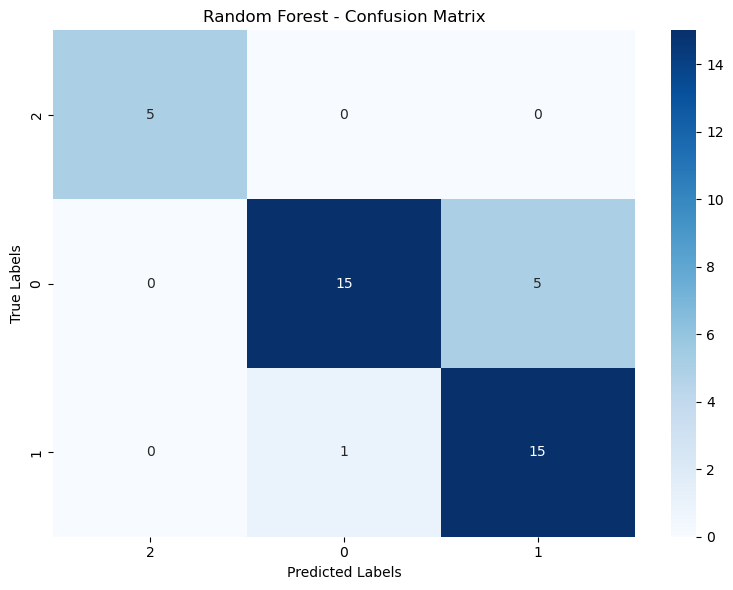

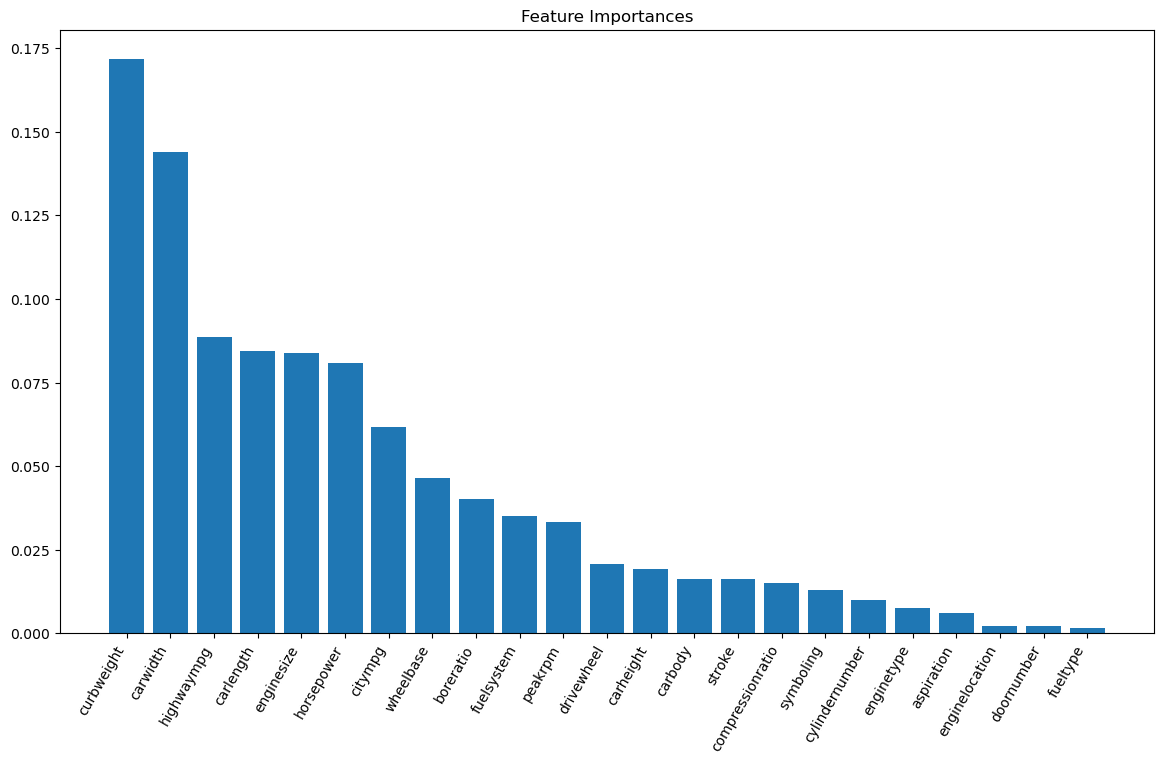

Feature Importance Ranking:
1. curbweight: 0.1719
2. carwidth: 0.1439
3. highwaympg: 0.0887
4. carlength: 0.0846
5. enginesize: 0.0839
6. horsepower: 0.0808
7. citympg: 0.0618
8. wheelbase: 0.0465
9. boreratio: 0.0402
10. fuelsystem: 0.0351
11. peakrpm: 0.0332
12. drivewheel: 0.0207
13. carheight: 0.0193
14. carbody: 0.0161
15. stroke: 0.0161
16. compressionratio: 0.0150
17. symboling: 0.0129
18. cylindernumber: 0.0099
19. enginetype: 0.0074
20. aspiration: 0.0061
21. enginelocation: 0.0023
22. doornumber: 0.0020
23. fueltype: 0.0016
--- SGD ---
Accuracy: 0.7561
Precision: 0.7749
Recall: 0.7561
Classification Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.88      0.75      0.81        20
           2       0.69      0.69      0.69        16

    accuracy                           0.76        41
   macro avg       0.73      0.81      0.76        41
weighted avg       0.77      0.76      0.76     

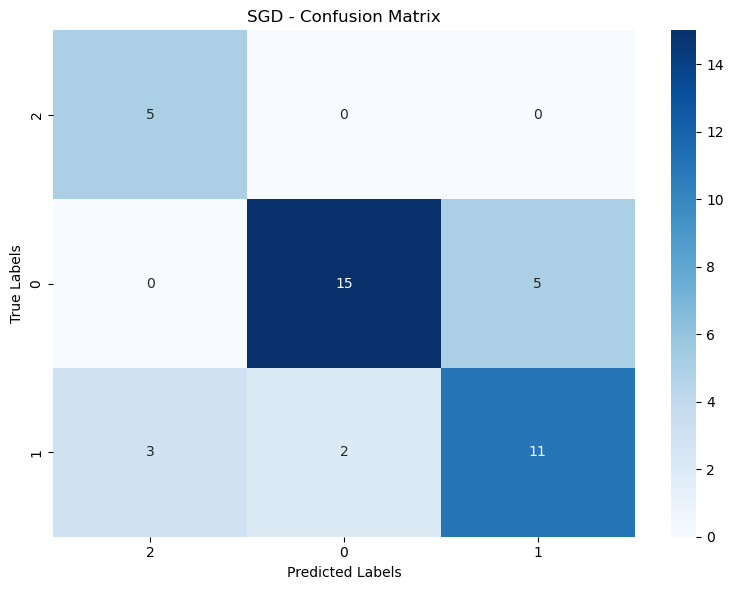

SGDClassifier doesn't have visual attributes like loss_curve_. Skipping visualization.
--- SVM ---
Accuracy: 0.8293
Precision: 0.8290
Recall: 0.8293
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.81      0.85      0.83        20
           2       0.80      0.75      0.77        16

    accuracy                           0.83        41
   macro avg       0.87      0.87      0.87        41
weighted avg       0.83      0.83      0.83        41



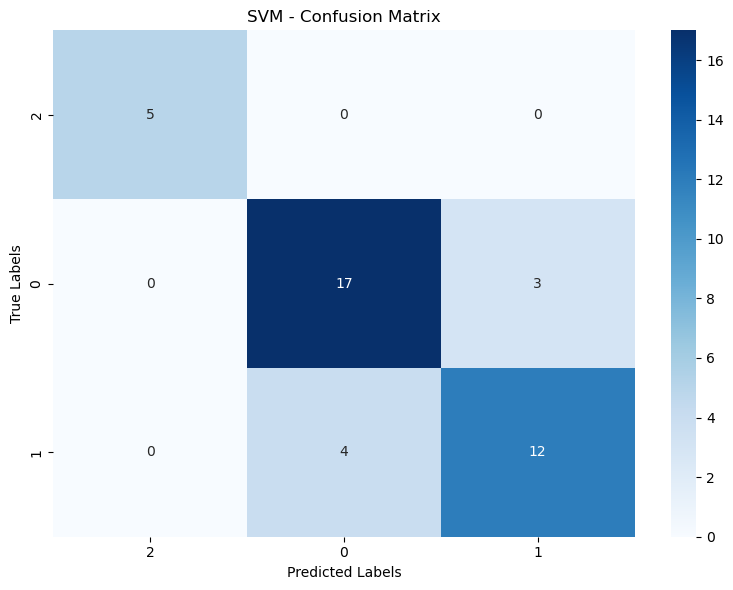

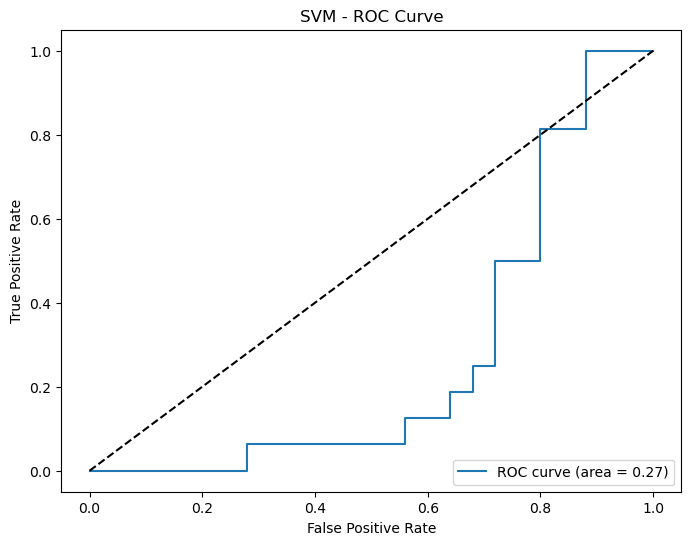

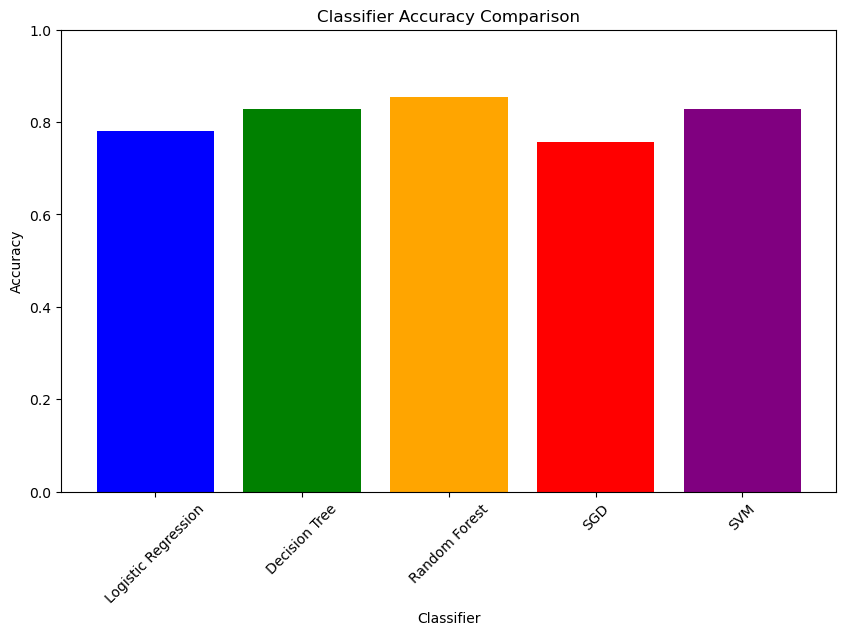

In [22]:
# ==========================================
# Train and Evaluate Models
# ==========================================
results = {}
for name, clf in classifiers.items():
    print(f"--- {name} ---")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    results[name] = {"accuracy": accuracy, "precision": precision, "recall": recall}
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, class_names=y.unique(), title=f"{name} - Confusion Matrix")

    # Unique visualizations
    if name == "Logistic Regression":
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        plot_roc_curve(y_test, y_pred_proba, title="Logistic Regression - ROC Curve")
    
    elif name == "Decision Tree":
        plot_decision_tree(clf, feature_names=X_train.columns, class_names=clf.classes_)
    
    elif name == "Random Forest":
        plot_feature_importance(clf, feature_names=X_train.columns)
    
    elif name == "SGD":
        print("SGDClassifier doesn't have visual attributes like loss_curve_. Skipping visualization.")
    
    elif name == "SVM":
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        plot_roc_curve(y_test, y_pred_proba, title="SVM - ROC Curve")

# Plot accuracy comparison bar chart
plt.figure(figsize=(10, 6))

# Extract accuracy values for each classifier
accuracy_values = [results[name]["accuracy"] for name in classifiers.keys()]

# Create the bar chart
plt.bar(classifiers.keys(), accuracy_values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Classifier Accuracy Comparison")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.xticks(rotation=45)
plt.show()

In [23]:
# ==========================================
# Parameter Tuning with GridSearchCV
# ==========================================
# Define parameter grids
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    'Decision Tree': {'max_depth': [3, 5, 10], 'criterion': ['gini', 'entropy']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]},
    'SGD': {'alpha': [0.0001, 0.001, 0.01], 'loss': ['hinge', 'log'], 'penalty': ['l2', 'l1']},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
}

# Perform GridSearchCV
tuned_results = {}
for name, clf in classifiers.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(clf, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Evaluate the best model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tuned_results[name] = {"accuracy": accuracy, "best_params": grid_search.best_params_}
    
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Accuracy after tuning: {accuracy:.4f}")

Tuning hyperparameters for Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy after tuning: 0.8049
Tuning hyperparameters for Decision Tree...
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10}
Accuracy after tuning: 0.7805
Tuning hyperparameters for Random Forest...
Best Parameters for Random Forest: {'max_depth': 5, 'n_estimators': 50}
Accuracy after tuning: 0.8537
Tuning hyperparameters for SGD...
Best Parameters for SGD: {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}
Accuracy after tuning: 0.7805
Tuning hyperparameters for SVM...
Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy after tuning: 0.8293


/opt/anaconda3/envs/scikit/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/scikit/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/scikit/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/scikit/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(


In [24]:
# ==========================================
# Feature Removal and Re-Evaluation
# ==========================================
# Select a subset of features
reduced_features = X_train.columns[:int(len(X_train.columns) * 0.8)]  # Retain 80% of features
X_train_reduced = X_train[reduced_features]
X_test_reduced = X_test[reduced_features]

print(f"Reduced feature set: {list(reduced_features)}")

# Retrain models with reduced features
reduced_results = {}
for name, clf in classifiers.items():
    print(f"--- Retraining {name} with reduced features ---")
    clf.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)
    accuracy = accuracy_score(y_test, y_pred)
    reduced_results[name] = accuracy
    print(f"Accuracy with reduced features: {accuracy:.4f}")


Reduced feature set: ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke']
--- Retraining Logistic Regression with reduced features ---
Accuracy with reduced features: 0.7561
--- Retraining Decision Tree with reduced features ---
Accuracy with reduced features: 0.8537
--- Retraining Random Forest with reduced features ---
Accuracy with reduced features: 0.8537
--- Retraining SGD with reduced features ---
Accuracy with reduced features: 0.7073
--- Retraining SVM with reduced features ---
Accuracy with reduced features: 0.8293


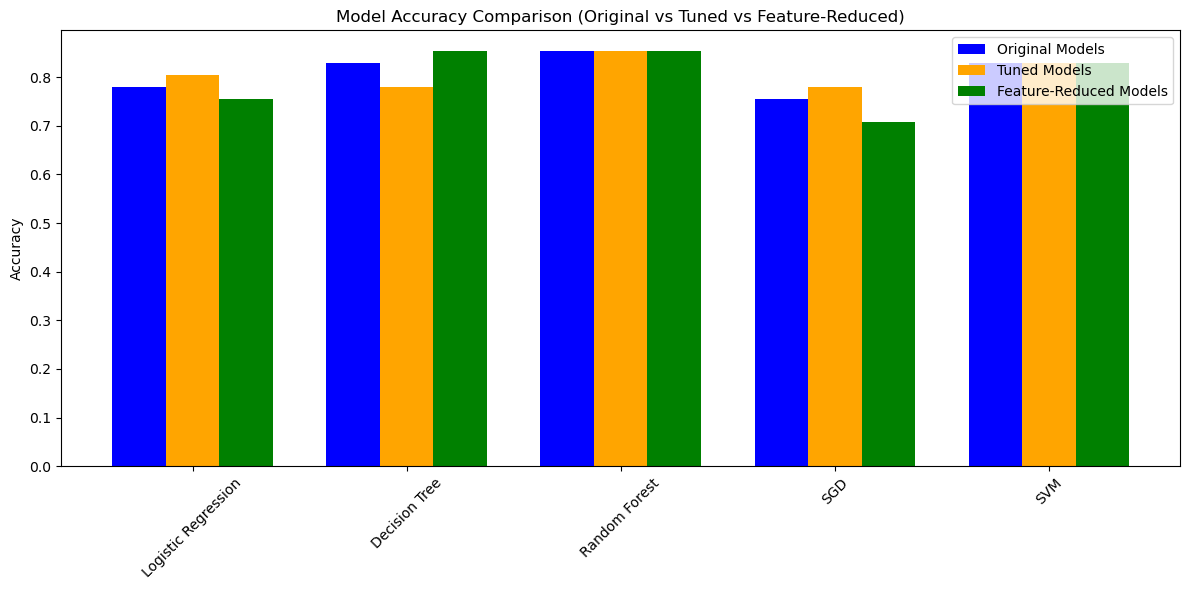

In [25]:
# ==========================================
# Compare Original, Tuned, and Feature-Reduced Models
# ==========================================

# Extract accuracy values
original_accuracies = [results[name]['accuracy'] for name in classifiers.keys()]
tuned_accuracies = [tuned_results[name]['accuracy'] for name in classifiers.keys()]
reduced_accuracies = [reduced_results[name] for name in classifiers.keys()]  # New line

# Plot comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(classifiers))

plt.bar(x - 0.25, original_accuracies, 0.25, label="Original Models", color="blue")
plt.bar(x, tuned_accuracies, 0.25, label="Tuned Models", color="orange")
plt.bar(x + 0.25, reduced_accuracies, 0.25, label="Feature-Reduced Models", color="green")  # New line

plt.xticks(x, classifiers.keys(), rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Original vs Tuned vs Feature-Reduced)")
plt.legend()
plt.tight_layout()
plt.show()